# pandas, matplotlib 임포트 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 경로에 있는 movie-ratings.csv파일 불러오기

In [2]:
file_path = 'movie-ratings.csv'
df = pd.read_csv(file_path)

# 데이터프레임 확인 

In [3]:
print(df.head())

                   Film      Genre  RottenTomatoesRatings  AudienceRatings  \
0  (500) Days of Summer     Comedy                     87               81   
1           10,000 B.C.  Adventure                      9               44   
2             12 Rounds     Action                     30               52   
3             127 Hours  Adventure                     93               84   
4              17 Again     Comedy                     55               70   

   Budget(million)  Yearofrelease  
0                8           2009  
1              105           2008  
2               20           2009  
3               18           2010  
4               20           2009  


# 1. 장르별 영화 수

크로스집계

In [31]:
genre_counts = pd.crosstab(index=df['Genre'], columns='count')

# 장르별 영화 수 내림차순 정렬
genre_counts = genre_counts.sort_values(by='count', ascending=False)

print(genre_counts)

col_0      count
Genre           
Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18


막대그래프 시각화

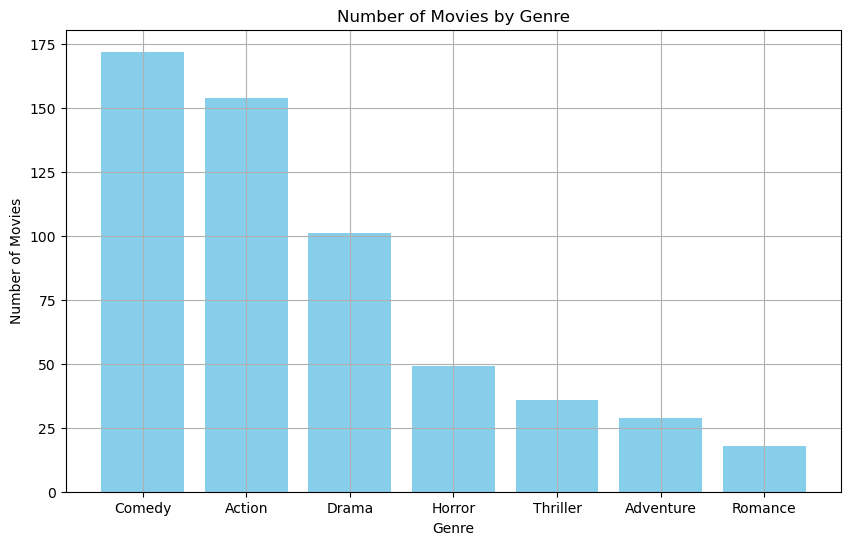

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts['count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# 개봉 연도별 영화 수

크로스집계

In [47]:
year_counts = pd.crosstab(index=df['Yearofrelease'], columns='count')
print(year_counts)

col_0          count
Yearofrelease       
2007              79
2008             122
2009             116
2010             119
2011             123


선 그래프

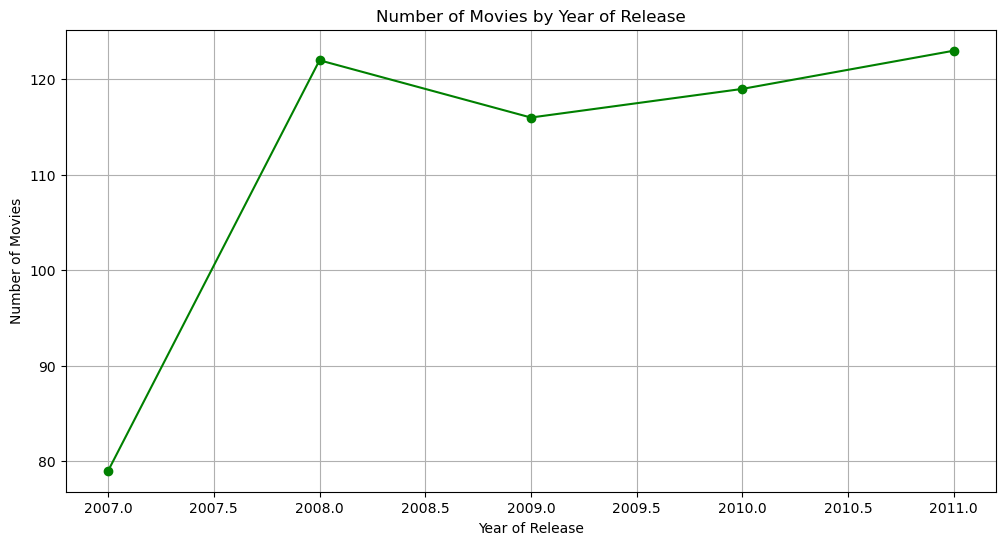

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts['count'], marker='o', linestyle='-', color='green')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year of Release')
plt.grid(True)
plt.show()

In [ ]:
# 예산 범위와 장르별 영화 수

In [ ]:
크로스 집계

In [49]:
bins = [0, 20, 40, 60, 80, 100, 200]
labels = ['0-20M', '20-40M', '40-60M', '60-80M', '80-100M', '100M+']
df['BudgetRange'] = pd.cut(df['Budget(million)'], bins=bins, labels=labels)
budget_genre_counts = pd.crosstab(index=df['BudgetRange'], columns=df['Genre'])
print(budget_genre_counts)

Genre        Action  Adventure  Comedy  Drama  Horror  Romance  Thriller
BudgetRange                                                             
0-20M            14          4      60     46      28        7         9
20-40M           41          6      53     36      18        4        11
40-60M           19          5      24     10       3        4         4
60-80M           15          4      21      6       0        1         3
80-100M          15          1       7      1       0        0         5
100M+            43          8       2      1       0        1         4


In [ ]:
스택드 바 그래프 시각화

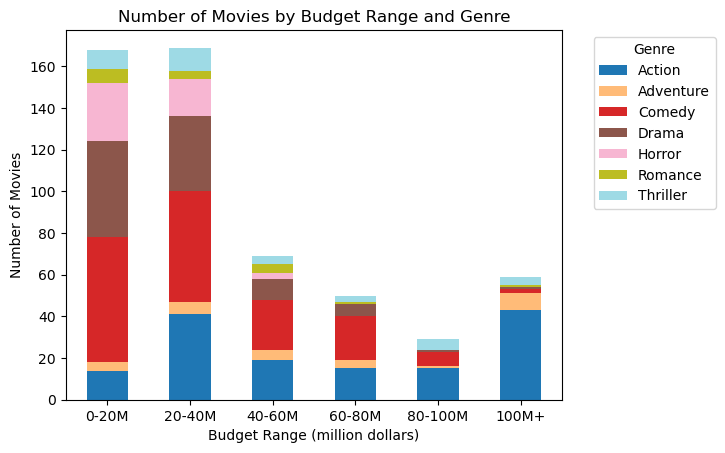

In [52]:
budget_genre_counts.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Budget Range (million dollars)')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Budget Range and Genre')
plt.xticks(rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')